# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 70 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 30 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
data = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
data.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
data.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
total = []

for i in data:
    total.append([i,data[i].dtypes,data[i].isna().sum(),(data[i].isna().sum()/data.shape[0])*100,
                data[i].nunique(),list(data[i].drop_duplicates().sample(2))])

pd.DataFrame(total, columns = ['DataFeature','DataType','null','nullPct', 'unique', 'uniqueSample'])

,DataFeature,DataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.000000,51065,"[2013102207611, 2009051158515]"
1,Date Received,object,70,0.137078,3522,"[23-Apr-04, 12-Jun-09]"
2,Incident Date,object,570,1.116203,10788,"[7/27/2010 0:00, 9/17/2010 23:30]"
3,Airport Code,object,2052,4.018329,405,"[AHN, CSG]"
4,Airport Name,object,2052,4.018329,419,"[Rochester; MN, Pease International]"
5,Airline Name,object,8555,16.752830,243,"[Mountain Air Express Inc, Southwest Airlines]"
6,Claim Type,object,1960,3.838170,8,"[Motor Vehicle, Employee Loss (MPCECA)]"
7,Claim Site,object,190,0.372068,6,"[-, Motor Vehicle]"
8,Item,object,1012,1.981749,1854,[Clothing; Cosmetics & Grooming; Cosmetics & G...
9,Claim Amount,object,992,1.942584,13248,"[$297.00 , $89.89 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object

In [8]:
for i in data:
    temp = data[data[i] == '-']
    temp[i] = np.nan
    data[data[i] == '-'] = temp
    
data.info()

/Users/frhamadiansyah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [9]:
data['Date Received'] = pd.to_datetime(data['Date Received'])
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 200-05-17 00:00:00

In [10]:
## Create a copy dataframe
datanew = data.copy()

In [11]:
## convert incident date columns to datetime format, coerce error into NaT
data['Incident Date'] = pd.to_datetime(data['Incident Date'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50460 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [12]:
data.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In [13]:
## Concat incident date from real dataframe to copy dataframe, and filter all error value
copydate = pd.concat([datanew, data[['Incident Date']]], axis = 1)
copydate.columns = ['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition','Error Date']
copydate[(copydate['Error Date'].isna()) & (copydate['Incident Date'].isna() == False)].drop('Error Date', axis = 1).head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [14]:
errordate = copydate[(copydate['Error Date'].isna()) & (copydate['Incident Date'].isna() == False)].drop('Error Date', axis = 1)

def replaceyear(value):
    tahun, date = value
    tahun = tahun.year
    return re.sub('[0-9][0-9][0-9][0-9]',str(tahun), date)

errordate['Incident Date'] = errordate[['Date Received', 'Incident Date']].apply(replaceyear, axis = 1)

In [15]:
errordate

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-2005 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-2005 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-2005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-2005 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-2005 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-2005 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-2005 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-2005 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-2005 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-2005 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [16]:
copydate[(copydate['Error Date'].isna()) & (copydate['Incident Date'].isna() == False)] = errordate
copydate['Incident Date'] = pd.to_datetime(copydate['Incident Date'])
copydate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
Error Date       50460 non-null datetime64[ns]
dtypes: datetime64[ns](3), object(11)
memory usage: 5.5+ MB


In [17]:
data = copydate.drop('Error Date', axis = 1)
data

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
5,2004050550501,2002-09-11,2002-08-05,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Passenger Property Loss,Checkpoint,Other,$1;200.00,Denied,NaN,Deny
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,$678.00,Approved,$678.00,Approve in Full
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,$175.00,Settled,$171.99,Settle
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,$150.00,Denied,$0.00,Deny
9,21021,2002-09-24,2002-08-31,PHL,Philadelphia International Airport,Delta Air Lines,Personal Injury,Other,Eyeglasses - (including contact lenses),$50;000.00,In litigation,NaN,NaN


Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [19]:
data.loc[list(errordate.index)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [20]:
data['Day Differences'] = data['Date Received'] - data['Incident Date']
# data['Day Differences'] = data['Day Differences'].apply(lambda x : x.day)
data['Day Differences'] = data['Day Differences'].apply(lambda x : x.days)
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0


Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

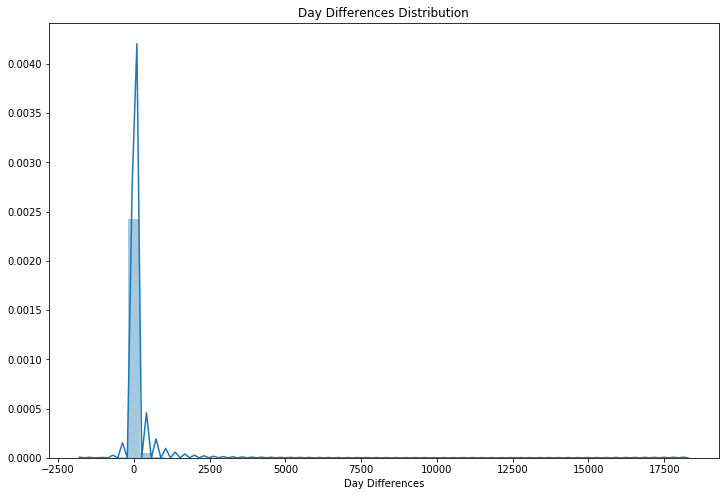

In [21]:
plt.figure (figsize = (12,8))
sns.distplot(data['Day Differences'].dropna())
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution Less Than 0')

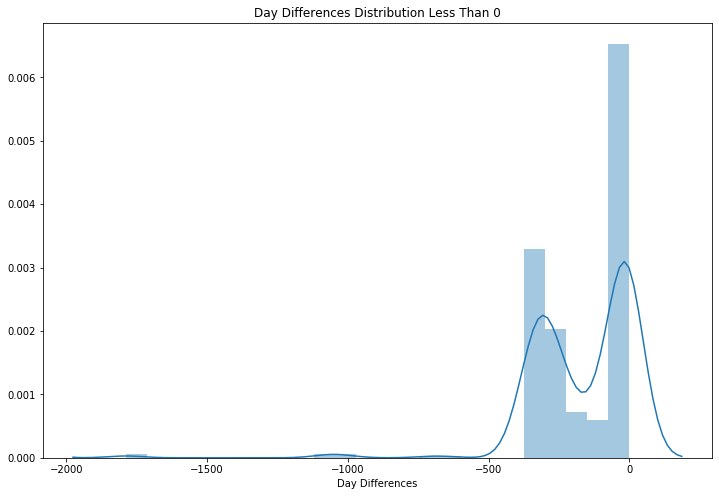

In [22]:
temp = data[data['Day Differences'] < 0]
plt.figure (figsize = (12,8))
sns.distplot(temp['Day Differences'].dropna())
plt.title('Day Differences Distribution Less Than 0')

Text(0.5, 1.0, 'Day Differences Distribution Over Than 1000')

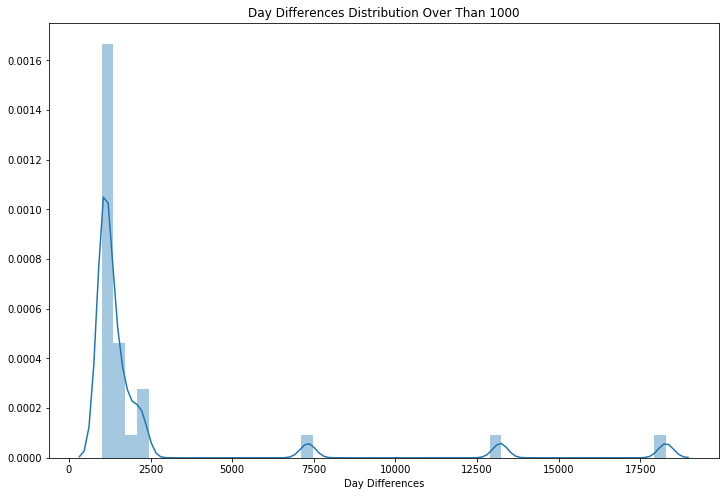

In [23]:
temp = data[data['Day Differences'] > 1000]
plt.figure (figsize = (12,8))
sns.distplot(temp['Day Differences'].dropna())
plt.title('Day Differences Distribution Over Than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

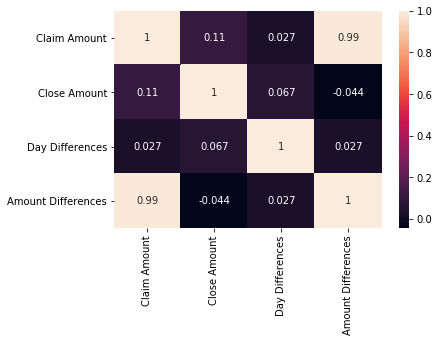

In [55]:
sns.heatmap(data[data['Day Differences'] < 0].corr(), annot = True)

From heatmap can be seen that there is no connection between day differences and other numerical value.

In [64]:
data[data['Day Differences'] < 0]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0,0.00
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),128.05,Denied,0.00,Deny,-325.0,128.05
113,0616756L,2002-12-03,2003-02-04 00:00:00,JAX,Jacksonville International,NaN,Passenger Property Loss,Checkpoint,Other,120.00,Approved,120.00,Approve in Full,-63.0,0.00
343,0114002M,2003-01-14,2003-12-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,1254.83,Denied,0.00,Deny,-340.0,1254.83
350,0115048M,2003-01-15,2003-10-08 00:00:00,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),49.99,Approved,49.99,Approve in Full,-266.0,0.00
354,0115031M,2003-01-15,2003-09-07 00:00:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),262.50,Settled,131.25,Settle,-235.0,131.25
494,0129008M,2003-01-29,2003-12-02 00:00:00,MIA,Miami International Airport,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),206.39,Denied,0.00,Deny,-307.0,206.39
512,0616806L,2003-01-30,2003-08-09 00:00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,36.65,Denied,0.00,Deny,-191.0,36.65
606,0211060L,2003-02-11,2003-11-27 00:00:00,PDX,Portland International,NaN,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,60.00,Settled,30.00,Settle,-289.0,30.00
620,0212048L,2003-02-12,2003-12-23 00:00:00,GEG,Spokane International,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,90.95,Approved,90.95,Approve in Full,-314.0,0.00


In [25]:
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number       51066 non-null object
Date Received      50996 non-null datetime64[ns]
Incident Date      50496 non-null datetime64[ns]
Airport Code       48915 non-null object
Airport Name       48915 non-null object
Airline Name       41470 non-null object
Claim Type         49035 non-null object
Claim Site         50817 non-null object
Item               48918 non-null object
Claim Amount       46886 non-null object
Status             47877 non-null object
Close Amount       33786 non-null object
Disposition        32846 non-null object
Day Differences    50460 non-null float64
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 5.5+ MB


Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [27]:
def cleanAmount(money):
    return re.sub('[$;]','',money)

tes = '$1;0000.00'
cleanAmount(data['Claim Amount'][0])
# re.sub('[$;]','',tes)
data['Claim Amount'] = data['Claim Amount'].apply(lambda x : re.sub("[$;]",'',str(x))).astype('float')
data['Close Amount'] = data['Close Amount'].apply(lambda x : re.sub("[$;]",'',str(x))).astype('float')
# data.head()

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [28]:
data['Amount Differences'] = data['Claim Amount'] - data['Close Amount']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [30]:
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

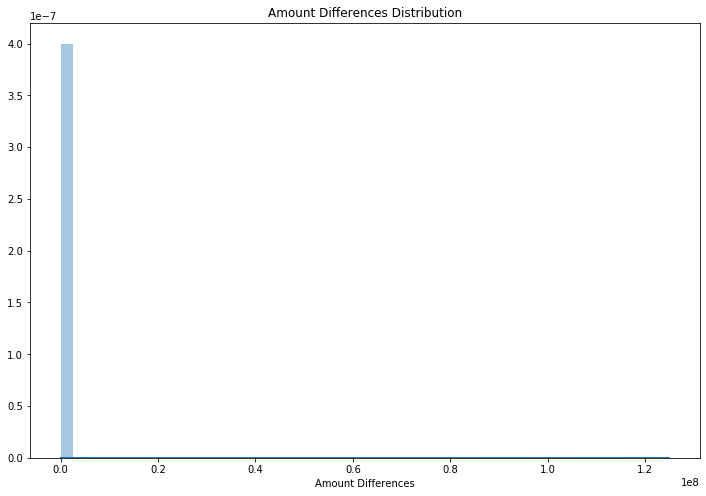

In [31]:
plt.figure (figsize = (12,8))
sns.distplot(data['Amount Differences'].dropna())
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [32]:
iqr = data['Amount Differences'].describe()['75%'] - data['Amount Differences'].describe()['25%']
upOutlier = data['Amount Differences'].describe()['75%'] + (1.5*iqr)
lowOutlier = data['Amount Differences'].describe()['25%'] - (1.5*iqr)
outlier = data[(data['Amount Differences'] < lowOutlier) | (data['Amount Differences'] > upOutlier)]
outlier

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
55,19809,2002-11-13,2002-10-21 00:00:00,SMF,Sacramento International Airport,Southwest Airlines,NaN,Other,Computer - Laptop,3500.00,Denied,0.00,Deny,23.0,3500.00
60,21173,2002-11-14,2002-10-19 00:00:00,LAS,McCarran International,Southwest Airlines,NaN,Other,Other,1600.00,Denied,0.00,Deny,26.0,1600.00
87,18808,2002-11-20,2002-09-24 00:00:00,CLT,Charlotte/Douglas International Airport,USAir,NaN,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,3800.00,Settled,1416.41,Settle,57.0,2383.59
108,21015,2002-11-29,2002-11-13 00:00:00,LAS,McCarran International,Continental Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),6111.59,Denied,0.00,Deny,16.0,6111.59
149,23124,2002-12-11,2002-11-03 00:00:00,CHS,Charleston International,USAir,Passenger Property Loss,Other,Jewelry - Fine,11500.00,Canceled,0.00,NaN,38.0,11500.00


In [33]:
outlier['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [34]:
outlier['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption? why? Try to explain it with the data 

I believe the assumption is true. To test this hypothesis, let's check with the outlier data

In [58]:
outlier['Disposition'].unique()

array([nan, 'Deny', 'Settle', 'Approve in Full'], dtype=object)

In [61]:
outlier['Disposition'].value_counts()

Deny               3450
Settle              413
Approve in Full       2
Name: Disposition, dtype: int64

From the value counts, can be seen that most of the disposition is denied. only 10 percent is settled. Can be assumed that the reason most of it is denied is because it is asking too much.

In [62]:
outlier[outlier['Disposition'] == 'Settle']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
87,18808,2002-11-20,2002-09-24 00:00:00,CLT,Charlotte/Douglas International Airport,USAir,NaN,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,3800.00,Settled,1416.41,Settle,57.0,2383.59
169,20718,2002-12-13,2002-11-07 00:00:00,LAX,Los Angeles International Airport,NaN,NaN,Other,Other,2808.17,Settled,1313.99,Settle,36.0,1494.18
183,21871,2002-12-16,2002-12-01 00:00:00,MCO,Orlando International Airport,Southwest Airlines,Property Damage,Checkpoint,Other,1933.14,Settled,962.15,Settle,15.0,970.99
252,0617703L,2002-12-30,2002-10-16 00:00:00,OKC,Will Rogers World,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),3432.00,Settled,2328.50,Settle,75.0,1103.50
267,0617706L,2003-01-02,2002-12-06 00:00:00,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Luggage (all types including footlockers),2720.00,Settled,1350.00,Settle,27.0,1370.00
271,22241,2003-01-03,2002-12-10 00:00:00,OKC,Will Rogers World,American Airlines,Personal Injury,Checkpoint,Other,1090.00,Settled,90.00,Settle,24.0,1000.00
321,0616559L,2003-01-13,NaT,OAK,Metropolitan Oakland International,NaN,NaN,Other,Luggage (all types including footlockers),1390.00,Settled,347.50,Settle,NaN,1042.50
323,0617710L,2003-01-13,2002-11-06 00:00:00,MIA,Miami International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,5000.00,Settled,1748.00,Settle,68.0,3252.00


## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [38]:
np.random.seed(101)

In [56]:
data_clean = data[(data['Amount Differences'] > lowOutlier) & (data['Amount Differences'] < upOutlier)]
data_clean.dropna(inplace = True)
data_clean = data_clean.sample(1000)
data_clean.head()

/Users/frhamadiansyah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
35505,2009092964135,2009-09-28,2009-09-03,SAN,San Diego International,American Airlines,Passenger Property Loss,Checked Baggage,Locks; Luggage (all types including footlockers),390.00,Denied,0.00,Deny,25.0,390.00
34736,2009071461231,2009-07-08,2009-06-11,PBI,Palm Beach International,American Airlines,Property Damage,Checkpoint,DVD/CD Players,167.59,Denied,0.00,Deny,27.0,167.59
32989,2008123053819,2008-12-22,2008-11-23,JFK,John F. Kennedy International,Air Canada,Passenger Property Loss,Checked Baggage,Jewelry - Costume,485.98,Settled,242.99,Settle,29.0,242.99
64,20472,2002-11-14,2002-11-04,ELP,El Paso International Airport,Southwest Airlines,Property Damage,Checkpoint,Jewelry - Fine,195.00,Settled,146.25,Settle,10.0,48.75
25695,2007041323967,2007-04-09,2007-03-27,BWI,Baltimore/Washington Intl Thurgood Marshall,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Costume,70.00,Settled,35.00,Settle,13.0,35.00


In [57]:
data_clean.to_csv('tsa_claims_dashboard_ujian.csv', index=False)

Export the data to your SQL database, and try to connect the database to the dashboard